# Resume Dataset Exploratory Data Analysis

This notebook analyses the extracted resume data to answer key questions about job applications, education patterns, hiring decisions, and skill correlations.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

Resume Dataset Overview

In [57]:
# Load the extracted resume data
df = pd.read_excel('extracted_resume_data.xlsx')

# Basic data cleaning: Remove entries with invalid names
df_filtered = df[df['Name'].notna() & (df['Name'].str.strip() != 'invalid')]

print(f"Total resumes: {len(df)}")
print(f"Columns: {list(df.columns)}")
print("\nDataset Info:")
df.info()

print(f"Total resumes: {len(df_filtered)}")
print(f"Columns: {list(df_filtered.columns)}")
print("\nDataset Info:")
df_filtered.info()

Total resumes: 7121
Columns: ['Original_Index', 'Role', 'Name', 'Phone', 'Email', 'LinkedIn', 'GitHub', 'Education', 'Experience', 'Skills', 'Decision', 'Reason']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7121 entries, 0 to 7120
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Original_Index  7121 non-null   int64 
 1   Role            7121 non-null   object
 2   Name            7120 non-null   object
 3   Phone           5178 non-null   object
 4   Email           5541 non-null   object
 5   LinkedIn        5492 non-null   object
 6   GitHub          2183 non-null   object
 7   Education       6274 non-null   object
 8   Experience      5822 non-null   object
 9   Skills          7121 non-null   object
 10  Decision        7121 non-null   object
 11  Reason          7121 non-null   object
dtypes: int64(1), object(11)
memory usage: 667.7+ KB
Total resumes: 5409
Columns: ['Original_Index'

## 1. Most Frequently Applied Jobs

Top 10 Most Applied Job Roles:
Role_standardized
Data Scientist               576
Software Engineer            554
Data Engineer                523
Product Manager              516
Data Analyst                 365
Ui Engineer                  364
Devops Engineer              185
Machine Learning Engineer    185
Qa Engineer                  184
Blockchain Developer         180
Name: count, dtype: int64


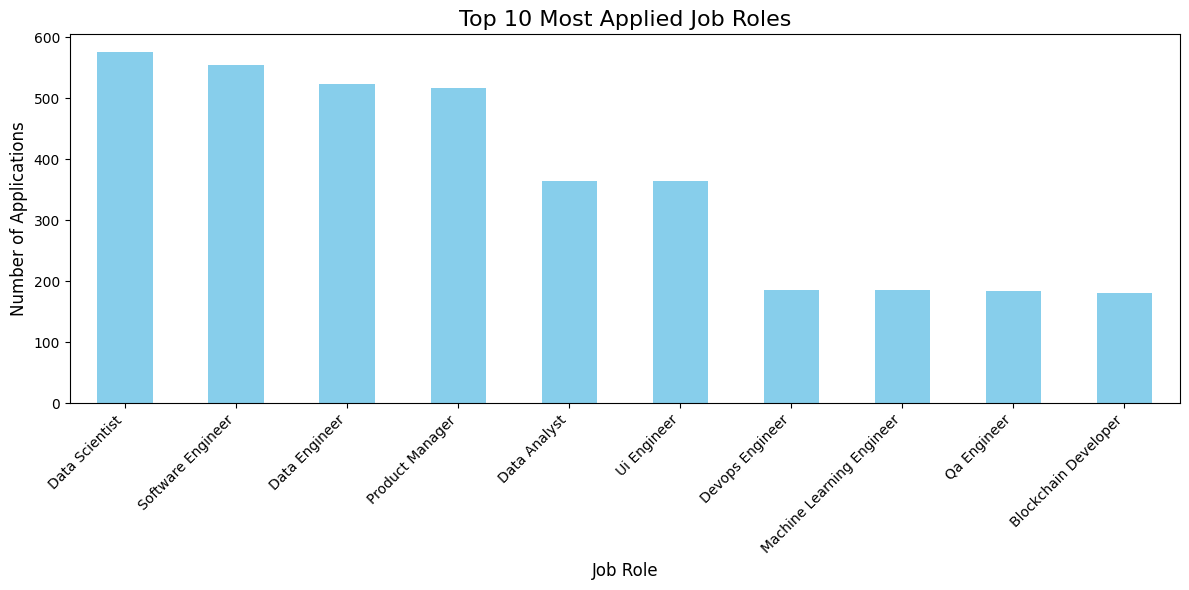

In [58]:
# Standardize job role capitalization
df['Role_standardized'] = df['Role'].str.title()
job_counts = df['Role_standardized'].value_counts().head(10)

print("Top 10 Most Applied Job Roles:")
print(job_counts)

plt.figure(figsize=(12, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Applied Job Roles', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2. Education Analysis: Universities and Degrees

In [59]:
import re
from collections import Counter

# Parse education data to separate schools and degrees
all_schools = []
all_degrees = []

def clean_school_name(school):
    """Remove years in parentheses and extra whitespace"""
    # Remove patterns like (2015), (2010-2014), (2015-2019)
    cleaned = re.sub(r'\s*\(\d{4}(?:-\d{4})?\)\s*', '', school)
    return cleaned.strip()

def standardize_degree(degree):
    """Standardize degree names"""
    degree_lower = degree.lower().strip()
    
    # Standardize Bachelor's degrees
    if 'bachelor' in degree_lower:
        if 'computer science' in degree_lower or 'cs' in degree_lower:
            return "Bachelor in Computer Science"
    
    # Return original if no match
    return degree

for education in df_filtered['Education'].dropna():
    if education:
        items = [item.strip() for item in education.split(';')]
        for item in items:
            # Check if item is a degree
            if any(keyword in item.lower() for keyword in ['bachelor', 'master', 'phd', 'b.s', 'm.s', 'ph.d', 'mba']):
                standardized_degree = standardize_degree(item)
                # standardized_degree = item
                all_degrees.append(standardized_degree)
            # Check if item is a school
            elif any(keyword in item.lower() for keyword in ['university', 'college', 'institute', 'school']):
                cleaned_school = clean_school_name(item)
                all_schools.append(cleaned_school)

# Count occurrences (case-insensitive for schools)
school_counts = Counter([school.lower() for school in all_schools])
degree_counts = Counter(all_degrees)

print("Top 10 Universities:")
for school, count in school_counts.most_common(10):
    print(f"  {school.title()}: {count}")

print("\nTop 10 Degrees:")
for degree, count in degree_counts.most_common(10):
    print(f"  {degree}: {count}")

Top 10 Universities:
  Xyz University: 6511
  Abc University: 1789
  Anytown University: 622
  University Of California: 506
  Def University: 445
  Stanford University: 404
  Management Institute: 160
  Certification Institute: 136
  Ghi University: 128
  Python Institute: 123

Top 10 Degrees:
  Bachelor in Computer Science: 3559
  Bachelor in Business Administration: 339
  Master in Science in Computer Science: 318
  Bachelor in Marketing: 203
  Ph.D. in Computer Science: 166
  Master in Science in Data Science: 160
  Bachelor in Human Resources: 136
  Bachelor in English: 136
  Bachelor in Science in Electrical Engineering: 96
  Master in Business Administration (MBA): 86


## 3. Candidate Profile Analysis

Candidate Profile Summary:
------------------------------
Valid names: 5410
Invalid names: 1711
Has email: 5541
Has LinkedIn: 5492
Has phone: 5178
Has GitHub: 2183


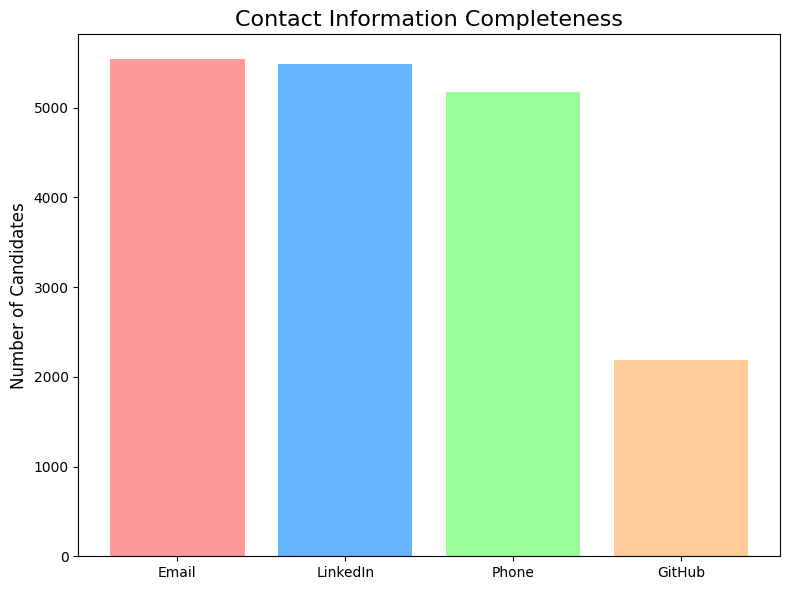

In [60]:
print("Candidate Profile Summary:")
print("-" * 30)
print(f"Valid names: {len(df[df['Name'] != 'invalid'])}")
print(f"Invalid names: {len(df[df['Name'] == 'invalid'])}")
print(f"Has email: {df['Email'].notna().sum()}")
print(f"Has LinkedIn: {df['LinkedIn'].notna().sum()}")
print(f"Has phone: {df['Phone'].notna().sum()}")
print(f"Has GitHub: {df['GitHub'].notna().sum()}")

# Contact info completeness visualization
contact_data = {
    'Email': df['Email'].notna().sum(),
    'LinkedIn': df['LinkedIn'].notna().sum(),
    'Phone': df['Phone'].notna().sum(),
    'GitHub': df['GitHub'].notna().sum()
}

plt.figure(figsize=(8, 6))
plt.bar(contact_data.keys(), contact_data.values(), color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Contact Information Completeness', fontsize=16)
plt.ylabel('Number of Candidates', fontsize=12)
plt.tight_layout()
plt.show()

## 4. Skills Analysis

Top 15 Skills:
  R: 5409
  Python: 2752
  Windows: 2453
  Operating Systems: 2404
  Linux: 2303
  Programming languages: 2054
  Java: 2021
  SQL: 1779
  AWS: 1558
  macOS: 1394
  Azure: 1268
  Machine Learning: 1218
  Scrum: 1175
  Kanban: 1150
  MySQL: 859


C:\Users\andre\AppData\Local\Temp\ipykernel_24412\2288433846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Skills_cleaned'] = df_filtered['Skills'].apply(lambda x: x if (pd.notna(x) and x.strip() != '') else None)


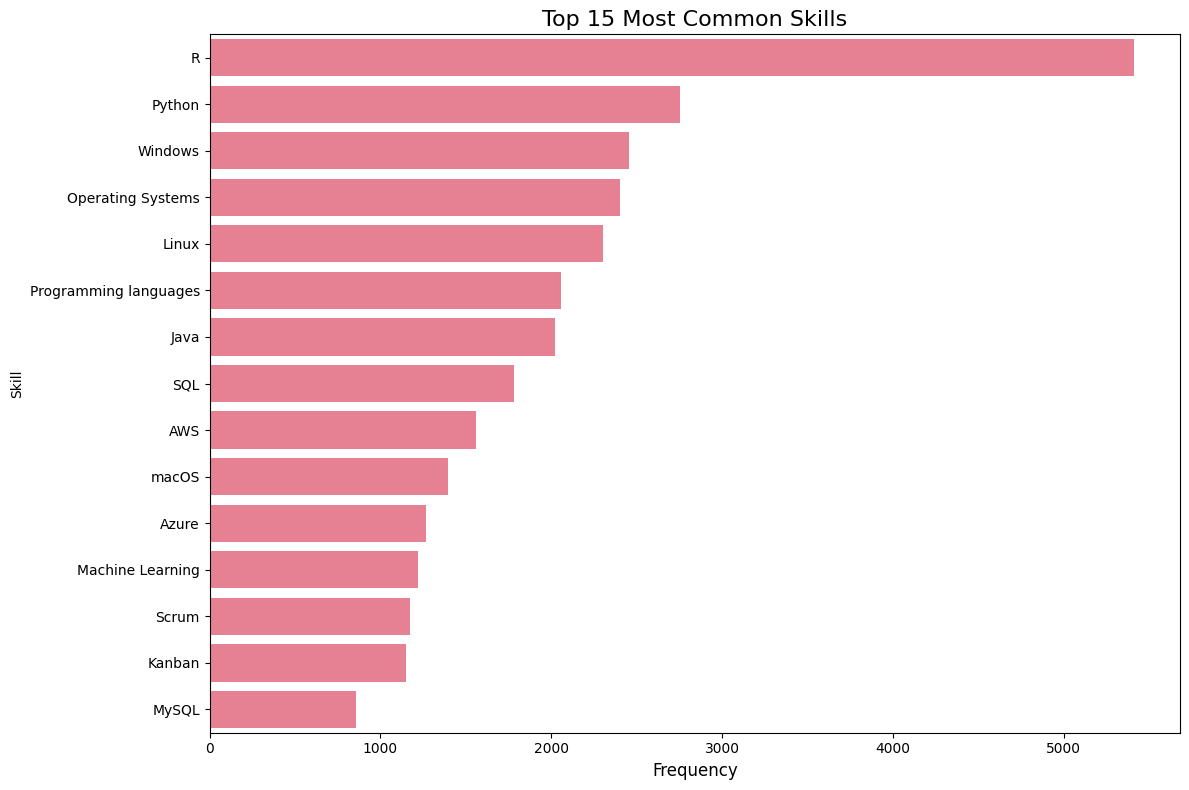

In [61]:
# Skills analysis
all_skills = []
df_filtered['Skills_cleaned'] = df_filtered['Skills'].apply(lambda x: x if (pd.notna(x) and x.strip() != '') else None)
for skills in df_filtered['Skills_cleaned']:
    if skills:
        # Split by semicolon, strip whitespace, and filter out empty strings
        all_skills.extend([s.strip() for s in skills.split(';') if s.strip()])

skill_counts = Counter(all_skills)
top_skills = dict(skill_counts.most_common(15))

print("Top 15 Skills:")
for skill, count in top_skills.items():
    print(f"  {skill}: {count}")

# Skills visualization
plt.figure(figsize=(12, 8))
skills_df = pd.DataFrame(list(top_skills.items()), columns=['Skill', 'Count'])
sns.barplot(data=skills_df, y='Skill', x='Count', orient='h')
plt.title('Top 15 Most Common Skills', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

## 5. Hiring vs Rejection Patterns

Decision Distribution:
Decision
select    2708
reject    2701
Name: count, dtype: int64


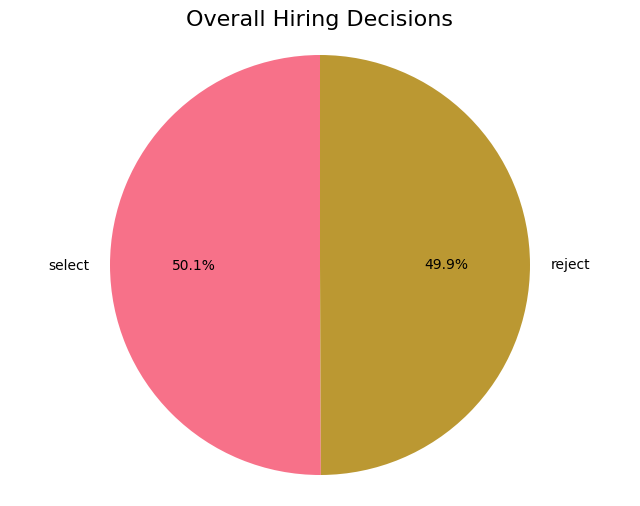


Decision by Job Role (Top 5 roles):

Software Engineer:
  reject: 160 (50.2%)
  select: 159 (49.8%)

Data Engineer:
  reject: 171 (56.6%)
  select: 131 (43.4%)

Product Manager:
  reject: 157 (53.6%)
  select: 136 (46.4%)

Data Scientist:
  reject: 152 (52.1%)
  select: 140 (47.9%)

Ui Engineer:
  select: 147 (52.1%)
  reject: 135 (47.9%)


C:\Users\andre\AppData\Local\Temp\ipykernel_24412\2702188564.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Role_standardized'] = df_filtered['Role'].str.title()


In [62]:
decision_counts = df_filtered['Decision'].value_counts()
print("Decision Distribution:")
print(decision_counts)

# Decision distribution pie chart
plt.figure(figsize=(8, 6))
plt.pie(decision_counts.values, labels=decision_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Hiring Decisions', fontsize=16)
plt.axis('equal')
plt.show()

# Decision by role
print("\nDecision by Job Role (Top 5 roles):")
df_filtered['Role_standardized'] = df_filtered['Role'].str.title()
top_roles = df_filtered['Role_standardized'].value_counts().head(5).index
for role in top_roles:
    role_data = df_filtered[df_filtered['Role_standardized'] == role]
    decisions = role_data['Decision'].value_counts()
    print(f"\n{role}:")
    for decision, count in decisions.items():
        percentage = (count / len(role_data)) * 100
        print(f"  {decision}: {count} ({percentage:.1f}%)")

<Figure size 1200x800 with 0 Axes>

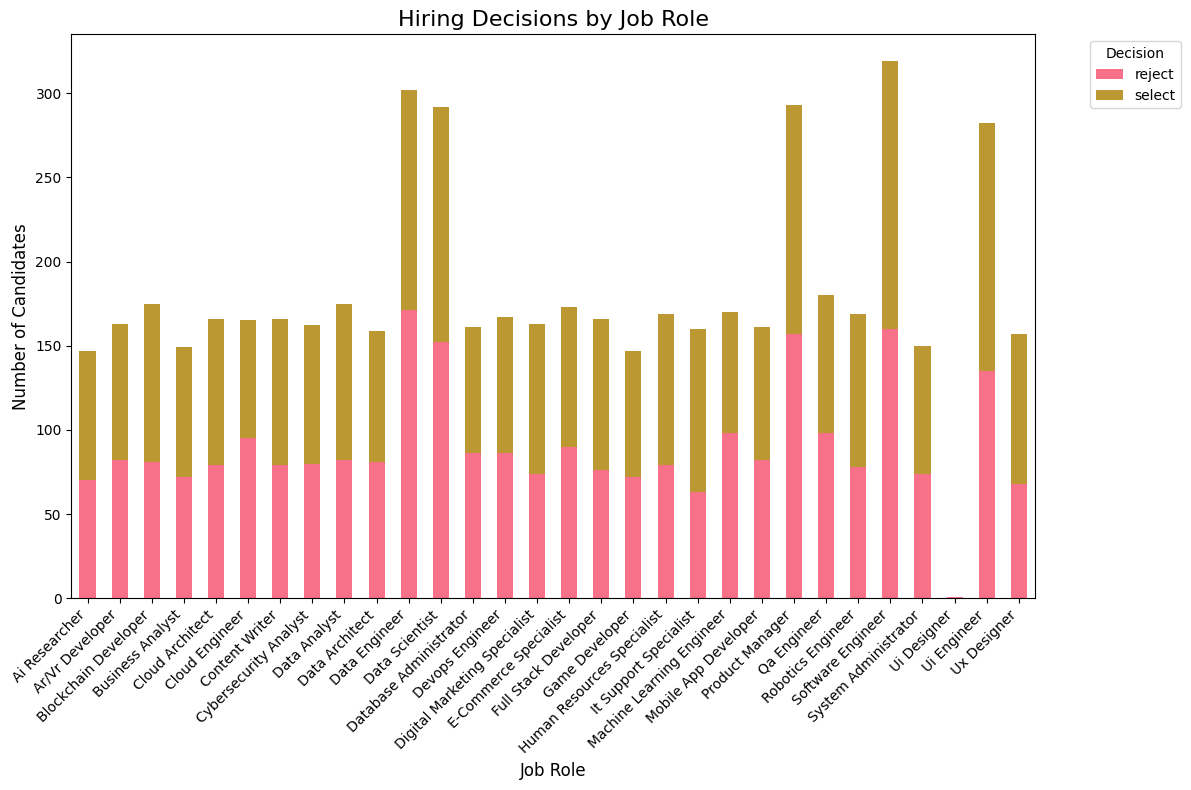

In [63]:
# Hiring decisions by role visualization
plt.figure(figsize=(12, 8))
role_decision = df_filtered.groupby(['Role_standardized', 'Decision']).size().unstack(fill_value=0)
role_decision.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Hiring Decisions by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 6. Experience Level and Skill Diversity Correlation

In [64]:
# Calculate skill diversity
df_filtered['skill_count'] = df_filtered['Skills'].apply(lambda x: len(x.split(';')) if pd.notna(x) and x else 0)

# Categorize experience level
def categorize_experience(exp_text):
    if pd.isna(exp_text) or not exp_text:
        return 'Unknown'
    exp_lower = exp_text.lower()
    if 'senior' in exp_lower or 'lead' in exp_lower or 'principal' in exp_lower:
        return 'Senior'
    elif 'junior' in exp_lower or 'entry' in exp_lower:
        return 'Junior'
    else:
        return 'Mid-level'

df_filtered['experience_level'] = df_filtered['Experience'].apply(categorize_experience)

exp_skill_analysis = df_filtered.groupby('experience_level')['skill_count'].agg(['mean', 'median', 'std']).round(2)
print("Skill Diversity by Experience Level:")
print(exp_skill_analysis)

# Correlation analysis
exp_mapping = {'Junior': 1, 'Mid-level': 2, 'Senior': 3, 'Unknown': 0}
correlation = df_filtered['skill_count'].corr(df_filtered['experience_level'].map(exp_mapping))
print(f"\nCorrelation between experience level and skill diversity: {correlation:.3f}")

Skill Diversity by Experience Level:
                   mean  median   std
experience_level                     
Junior            27.62    26.0  8.35
Mid-level         25.09    26.0  8.46
Senior            23.69    25.0  8.20
Unknown           20.89    21.0  7.66

Correlation between experience level and skill diversity: 0.173


C:\Users\andre\AppData\Local\Temp\ipykernel_24412\3209661965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['skill_count'] = df_filtered['Skills'].apply(lambda x: len(x.split(';')) if pd.notna(x) and x else 0)
C:\Users\andre\AppData\Local\Temp\ipykernel_24412\3209661965.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['experience_level'] = df_filtered['Experience'].apply(categorize_experience)


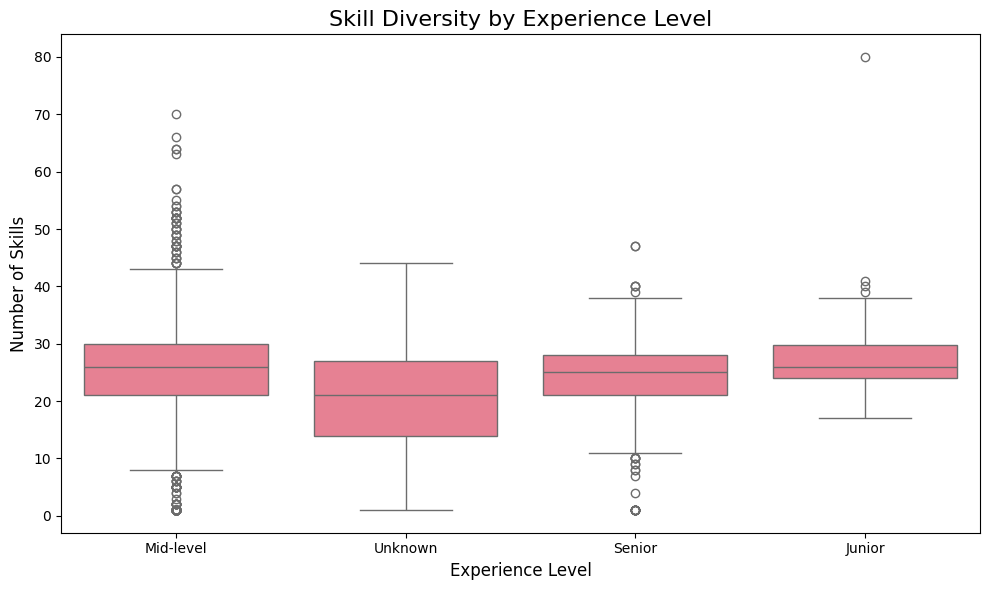

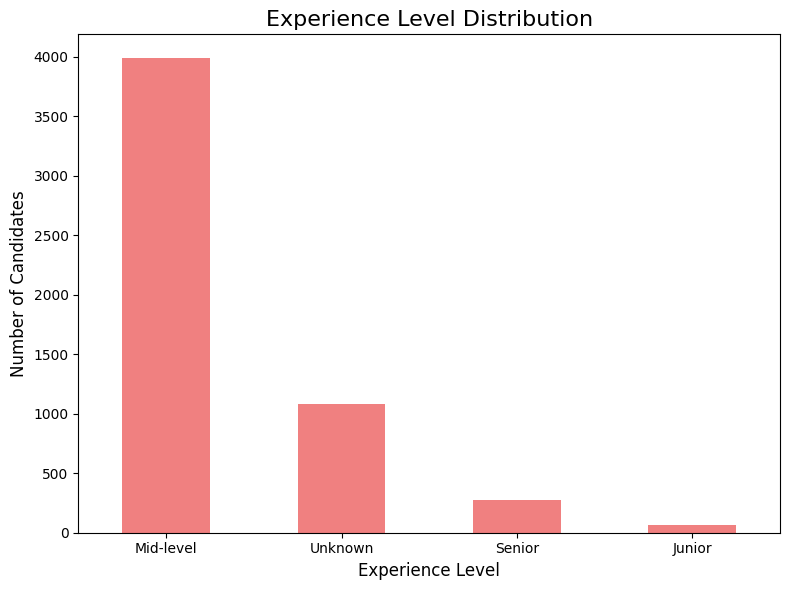

In [65]:
# Skill diversity visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='experience_level', y='skill_count')
plt.title('Skill Diversity by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Number of Skills', fontsize=12)
plt.tight_layout()
plt.show()

# Experience level distribution
plt.figure(figsize=(8, 6))
df_filtered['experience_level'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Experience Level Distribution', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Summary Insights

In [68]:
print("=" * 50)
print("SUMMARY INSIGHTS:")
print("=" * 50)

most_applied_role = job_counts.index[0]
most_applied_count = job_counts.iloc[0]
most_common_school = school_counts.most_common(1)[0][0] if school_counts else 'N/A'
most_common_degree = degree_counts.most_common(1)[0][0] if degree_counts else 'N/A'
most_common_skill = skill_counts.most_common(1)[0][0] if skill_counts else 'N/A'
acceptance_rate = (decision_counts.get('select', 0) / len(df_filtered) * 100)
avg_skills = df_filtered['skill_count'].mean()

print(f"• Most applied role: {most_applied_role} ({most_applied_count} applications)")
print(f"• Most common university: {most_common_school}")
print(f"• Most common degree: {most_common_degree}")
print(f"• Most common skill: {most_common_skill}")
print(f"• Overall acceptance rate: {acceptance_rate:.1f}%")
print(f"• Average skills per candidate: {avg_skills:.1f}")
print(f"• Experience-skill correlation: {correlation:.3f}")

SUMMARY INSIGHTS:
• Most applied role: Data Scientist (576 applications)
• Most common university: xyz university
• Most common degree: Bachelor in Computer Science
• Most common skill: R
• Overall acceptance rate: 50.1%
• Average skills per candidate: 24.2
• Experience-skill correlation: 0.173
